<img src="header.png" align="left"/>

# Exercise: Classification of MNIST (10 points)


Die goal of this exercise is to create a simple image classification network and to work on the improvement of a model and how to debug and check the training data. We start with a simple CNN model for digit classification of the MNIST dataset [1].  This dataset contains 60,000 scans of digits for training and 10,000 scans of digits for validation. A sample consists of 28x28 features with values between 0 and 255, note that the features are inverted. Actually digits are rather dark on a light background. MNIST digits are light on a dark background.
This example is partly based on a tutorial by Jason Brownlee [2]. 
Please follow the instructions in the notebook.


```
[1] http://yann.lecun.com/exdb/mnist/
[2] https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
```

**NOTE**

Document your results by simply adding a markdown cell or a python cell (as comment) and writing your statements into this cell. For some tasks the result cell is already available.




In [1]:
#
# Turn off errors and warnings (does not work sometimes)
#
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)


#
# Import some modules
#
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_json
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#
# Diagram size
#
plt.rcParams['figure.figsize'] = [16, 9]


#
# nasty hack for macos
#
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#
# check version
#
print('starting notebook with tensorflow version {}'.format(tf.version.VERSION))

starting notebook with tensorflow version 2.0.0


# Load and prepare data

In [2]:
#
# Loading of the data (very simplified) with split into train and test data (fixed split)
#
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
#
# Check some data rows
#
x_train[0][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
        90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [6]:
#
# Print shapes of data
#
print('training data: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('test     data: X=%s, y=%s' % (x_test.shape, y_test.shape))

training data: X=(60000, 28, 28), y=(60000,)
test     data: X=(10000, 28, 28), y=(10000,)


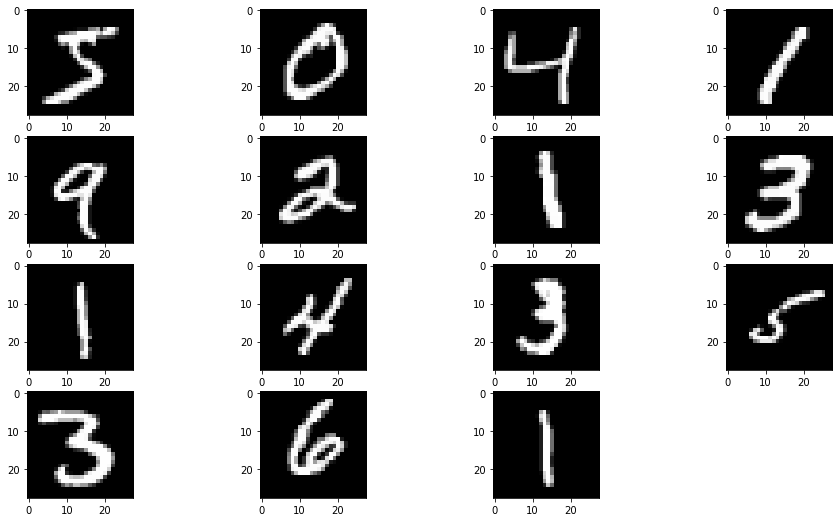

In [7]:
#
# Display some examples of the data
#
for i in range(15):
    plt.subplot(4,4,1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
#
# Display labels of some data
#
for i in range(15):
    print('label {}'.format(y_train[i]))

label 5
label 0
label 4
label 1
label 9
label 2
label 1
label 3
label 1
label 4
label 3
label 5
label 3
label 6
label 1


<div class="alert alert-block alert-info">

## Task

Plot a histogram of the classes of the training data (1 point).
    
After plotting, give a short estimation if this distribution is OK for use in a classification situation.
</div>

In [ ]:
#
# Histogram of class counts (digits)
#
# Task: plot the histogram as array or as plot
#

# Prepare data for classification

<div class="alert alert-block alert-info">

## Task

Find out why the unusual shap of the input data is required? Why is (-1,28,28) not sufficien? (1 point)
    
Give a short description here in the comment.
Hint: check the tensorflow keras documentation about 2D cnn layer.
</div>

In [ ]:
# 
# Change shape of data for model
#
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
#
# your anser here
#

In [ ]:
# 
# Scale pixel values into range of 0 to 1
#
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# check one transformed sample row
x_train[0][10]

In [ ]:
# 
# One-hot encoding for classes
#
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# check the one-hot encoding
y_train

# Build the first model

<div class="alert alert-block alert-info">

## Task

Complete the code for a simple convolutional neural network (CNN) with one CNN layer (2 Points).

Hint: look for examples in the internet or in the slides.

</div>

In [ ]:
model = Sequential()

...

model.add(Dense(10, activation='softmax'))

In [ ]:
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# get a short summary of the model
model.summary()

In [ ]:
# train model
history = model.fit(x_train, y_train, batch_size=128, epochs=5 )

# First prediction with model

<div class="alert alert-block alert-info">

## Task

Describe the meaning of the numbers returned from the prediction. (1 point)

Write your findings here in the comments

Hint: look at the definition of the output layer (last layer) in the model.

</div>

In [ ]:
model.predict(x_train[:1])

In [ ]:
# compare with expexted result
y_train[:1]

In [ ]:
#
# Measure the accuracy
#
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('accuracy {:.5f}'.format(acc))

In [ ]:
#
# Estimate the number of false classifications in production use
#
print('with {} samples there are about {:.0f} false classifications to expect.'.format( x_test.shape[0], (x_test.shape[0]*(1-acc))))

# Print out training progress

In [ ]:
#
# Plot loss and accuracy
#
def summarize_diagnostics(history,modelname):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='green', label='train')
    plt.subplots_adjust(hspace=0.5)
    plt.savefig( 'results/' + modelname + '_plot.png')
    plt.show()
    plt.close()

In [ ]:
summarize_diagnostics(history,'03_model1')

# Improve the model significantly


<div class="alert alert-block alert-info">

## Task

Your customer requires to have less than 1% of wrong classifications. Start to build a better 
model with significantly less than 100 wrong classifications in the 10000 test samples. 
Research the internet for the optimal model setup for MNIST classification and try to replicate this model here. 
Make sure to document the source where you found the hints for the improvement (links to sources) (2 Points).

</div>

In [ ]:
#
# Setup new model
#

def create_model_2():
    model = Sequential()
    
    ...
    
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
#
# instantiate model
#
model2 = create_model_2()

In [ ]:
#
# compile
#
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#
# train with history
#
history = model2.fit(x_train, y_train, batch_size=128, epochs=15 )

In [ ]:
#
# Measure the accuracy
#
_, acc = model2.evaluate(x_test, y_test, verbose=0)
print('Accuracy {:.5f}'.format(acc))

In [ ]:
#
# Estimate the number of false classifications in production use
#
print('with {} samples there are about {:.0f} false classifications to expect.'.format( x_test.shape[0], (x_test.shape[0]*(1-acc))))

In [ ]:
# Result: (describe where you found the hints for improvement and how much it improved)

In [ ]:
model2.summary()

In [ ]:
summarize_diagnostics(history,'03_model2')

# Save the model

In [ ]:
#
# Save a model for later use
#
prefix = 'results/03_'
modelName = prefix + "model.json"
weightName = prefix + "model.h5"

# set to True if the model should be saved
save_model = False
if save_model:
    model_json = model2.to_json()
    with open( modelName , "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model2.save_weights( weightName )
    print("saved model to disk as {} {}".format(modelName,weightName))
    
else:

    # load model (has to be saved before, model is not part of git)    
    json_file = open(modelName, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model2 = model_from_json(loaded_model_json)
    # load weights into new model
    model2.load_weights(weightName)
    print("loaded model from disk")
    

# Find characteristics in the errors of the model

<div class="alert alert-block alert-info">

## Task

There are still too many false classifications using the model. 
Evaluate all test data and plot examples of failed classifications to get a better undestanding what goes wring. 
Plot a confusion matrix to get a better insight. (1 Point).

</div>

In [ ]:
y_test_predictions = model2.predict(x_test)

In [ ]:
#
# generate confusion matrix
# Task: find a suitable function for generating a confusion matrix as array
# 
confusion = ...

In [ ]:
print(confusion)

In [ ]:
# make a nice plot of the confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# plot confusion matrix
plot_confusion_matrix(confusion,['0','1','2','3','4','5','6','7','8','9'] )

# Improve the training 

Beside many other options, there are two streight forward ways to improve your model:

1. Add more data for those classes which are poorely classified
1. Add augmentation for the training data

Implement the augmentation strategy and test if there is an improvement.


## Augmentation

<div class="alert alert-block alert-info">

## Task

Task: Search the internet for the ImageDataGenerator class of the Keras framework 
and implement such a generator for the training of the model. 
Select suitable augmentation which fits to the use-case. 
Document the resulting accuracy. (2 Points)

</div>

In [ ]:
# Augmentation solution

In [ ]:
...

In [ ]:
# instantiate model
model3 = create_model_2()

In [ ]:
# Training
...

In [ ]:
#
# Evaluierung
#
_, acc = model3.evaluate(x_test, y_test, verbose=0)
print('accuracy {:.3f} '.format(acc) )

In [ ]:
summarize_diagnostics(history,'03_model3')

In [ ]:
y_test_predictions = model3.predict(x_test)

In [ ]:
# generate confusion matrix
confusion = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_test_predictions,axis=1))

In [ ]:
# plot confusion matrix
plot_confusion_matrix(confusion,['0','1','2','3','4','5','6','7','8','9'] )